In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# pip install nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iqras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Iqras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
valdf= pd.read_csv('twitter_validation.csv')
tradf= pd.read_csv('twitter_training.csv')
print(valdf.head(2))
print(tradf.head(2))


   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all , 

In [3]:
valdf.head(3)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."


In [4]:
valdf.describe()

,3364
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


In [5]:
valdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [6]:
valdf.columns=['id', 'information', 'type', 'text']
valdf

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
preprocessed_text = valdf['text'].apply(preprocess_text) # type: ignore
print(preprocessed_text)

NameError: name 'preprocess_text' is not defined

In [ ]:
tokens = valdf['text'].apply(word_tokenize)
print(tokens)

0      [BBC, News, -, Amazon, boss, Jeff, Bezos, reje...
1      [@, Microsoft, Why, do, I, pay, for, WORD, whe...
2      [CSGO, matchmaking, is, so, full, of, closet, ...
3      [Now, the, President, is, slapping, Americans,...
4      [Hi, @, EAHelp, I, ’, ve, had, Madeleine, McCa...
                             ...                        
994    [⭐️, Toronto, is, the, arts, and, culture, cap...
995    [tHIS, IS, ACTUALLY, A, GOOD, MOVE, TOT, BRING...
996    [Today, sucked, so, it, ’, s, time, to, drink,...
997    [Bought, a, fraction, of, Microsoft, today, .,...
998    [Johnson, &, Johnson, to, stop, selling, talc,...
Name: text, Length: 999, dtype: object


In [ ]:
filtered_tokens = [word for word in tokens if word[0].lower() not in stop_words]
print(filtered_tokens)

[['BBC', 'News', '-', 'Amazon', 'boss', 'Jeff', 'Bezos', 'rejects', 'claims', 'company', 'acted', 'like', 'a', "'drug", 'dealer', "'", 'bbc.co.uk/news/av/busine…'], ['@', 'Microsoft', 'Why', 'do', 'I', 'pay', 'for', 'WORD', 'when', 'it', 'functions', 'so', 'poorly', 'on', 'my', '@', 'SamsungUS', 'Chromebook', '?', '🙄'], ['CSGO', 'matchmaking', 'is', 'so', 'full', 'of', 'closet', 'hacking', ',', 'it', "'s", 'a', 'truly', 'awful', 'game', '.'], ['Hi', '@', 'EAHelp', 'I', '’', 've', 'had', 'Madeleine', 'McCann', 'in', 'my', 'cellar', 'for', 'the', 'past', '13', 'years', 'and', 'the', 'little', 'sneaky', 'thing', 'just', 'escaped', 'whilst', 'I', 'was', 'loading', 'up', 'some', 'fifa', 'points', ',', 'she', 'took', 'my', 'card', 'and', 'I', '’', 'm', 'having', 'to', 'use', 'my', 'paypal', 'account', 'but', 'it', 'isn', '’', 't', 'working', ',', 'can', 'you', 'help', 'me', 'resolve', 'it', 'please', '?'], ['Thank', 'you', '@', 'EAMaddenNFL', '!', '!', 'New', 'TE', 'Austin', 'Hooper', 'in', 

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmed_words = [stemmer.stem(word[0]) for word in filtered_tokens] # type: ignore
print(stemmed_words)

['bbc', '@', 'csgo', 'hi', 'thank', 'rocket', 'fix', 'itch', '@', 'csgo', '@', 'congrat', 'yeah', 'fuck', 'happi', 'anyon', 'call', 'final', 'umm', '#', 'yo', 'best', '@', 'watch', 'johnson', 'fortnit', 'great', 'solo', '//the', '@', 'amazon', 'melusi', 'never', '@', 'thank', '@', 'ok', 'big', 'everyon', '#', 'johnson', '@', 'sound', 'seem', '@', 'god', '@', 'aoc', 'oooooh', 'nyummm', 'call', '“', 'fuckkkkkk', 'oh', 'gm', 'play', 'leak', 'wilson', 'flip', '@', '@', '#', '🤔', '@', 'let', 'great', 'watch', 'feel', 'interest', 'even', 'red', 'one', 'joe', 'congratul', 'hey', 'peopl', 'see', 'happi', 'well', 'stream', 'sorta', 'earli', 'oh', '@', 'holyyyyi', 'pt', 'noth', 'finnish', '“', 'see', 'team', 'twitter.com/pcgamer/status…', 'complet', 'xboxaimbot.com', '$', 'play', '@', 'back', '@', 'first', 'excit', 'wow', 'damn', 'wtf', 'thank', 'big', 'today', 'yo', 'watch', 'hella', 'good', 'west', 'your', 'googl', 'cs', 'red', 'play', 'normal', '@', 'damn', 'go', 'first', '@', 'platinum', '\u

In [ ]:
new_filtered_words = [
    word for word in tokens if word[0].lower() not in stopwords.words('english')]


In [ ]:
new_clean_text = ' '.join(str(word) for word in new_filtered_words)
new_clean_text


'[\'BBC\', \'News\', \'-\', \'Amazon\', \'boss\', \'Jeff\', \'Bezos\', \'rejects\', \'claims\', \'company\', \'acted\', \'like\', \'a\', "\'drug", \'dealer\', "\'", \'bbc.co.uk/news/av/busine…\'] [\'@\', \'Microsoft\', \'Why\', \'do\', \'I\', \'pay\', \'for\', \'WORD\', \'when\', \'it\', \'functions\', \'so\', \'poorly\', \'on\', \'my\', \'@\', \'SamsungUS\', \'Chromebook\', \'?\', \'🙄\'] [\'CSGO\', \'matchmaking\', \'is\', \'so\', \'full\', \'of\', \'closet\', \'hacking\', \',\', \'it\', "\'s", \'a\', \'truly\', \'awful\', \'game\', \'.\'] [\'Hi\', \'@\', \'EAHelp\', \'I\', \'’\', \'ve\', \'had\', \'Madeleine\', \'McCann\', \'in\', \'my\', \'cellar\', \'for\', \'the\', \'past\', \'13\', \'years\', \'and\', \'the\', \'little\', \'sneaky\', \'thing\', \'just\', \'escaped\', \'whilst\', \'I\', \'was\', \'loading\', \'up\', \'some\', \'fifa\', \'points\', \',\', \'she\', \'took\', \'my\', \'card\', \'and\', \'I\', \'’\', \'m\', \'having\', \'to\', \'use\', \'my\', \'paypal\', \'account\',

In [ ]:
print("Original Text:", tokens)
print("Text after Stopword Removal:", new_clean_text)

Original Text: 0      [BBC, News, -, Amazon, boss, Jeff, Bezos, reje...
1      [@, Microsoft, Why, do, I, pay, for, WORD, whe...
2      [CSGO, matchmaking, is, so, full, of, closet, ...
3      [Now, the, President, is, slapping, Americans,...
4      [Hi, @, EAHelp, I, ’, ve, had, Madeleine, McCa...
                             ...                        
994    [⭐️, Toronto, is, the, arts, and, culture, cap...
995    [tHIS, IS, ACTUALLY, A, GOOD, MOVE, TOT, BRING...
996    [Today, sucked, so, it, ’, s, time, to, drink,...
997    [Bought, a, fraction, of, Microsoft, today, .,...
998    [Johnson, &, Johnson, to, stop, selling, talc,...
Name: text, Length: 999, dtype: object
Text after Stopword Removal: ['BBC', 'News', '-', 'Amazon', 'boss', 'Jeff', 'Bezos', 'rejects', 'claims', 'company', 'acted', 'like', 'a', "'drug", 'dealer', "'", 'bbc.co.uk/news/av/busine…'] ['@', 'Microsoft', 'Why', 'do', 'I', 'pay', 'for', 'WORD', 'when', 'it', 'functions', 'so', 'poorly', 'on', 'my', '@', 'Samsung

In [ ]:
from textblob import TextBlob

In [ ]:
testimonial = TextBlob(valdf['text'].to_string())
print(testimonial.sentiment)


Sentiment(polarity=0.11391607163300868, subjectivity=0.5406645623592318)


In [ ]:
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer() # type: ignore

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Iqras\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
valdf['sentiment'] = valdf['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
valdf.head(2)

,id,information,type,text,sentiment
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,-0.0000
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,-0.1027


In [ ]:
sentiment_trends = valdf.groupby('information')['sentiment'].mean()

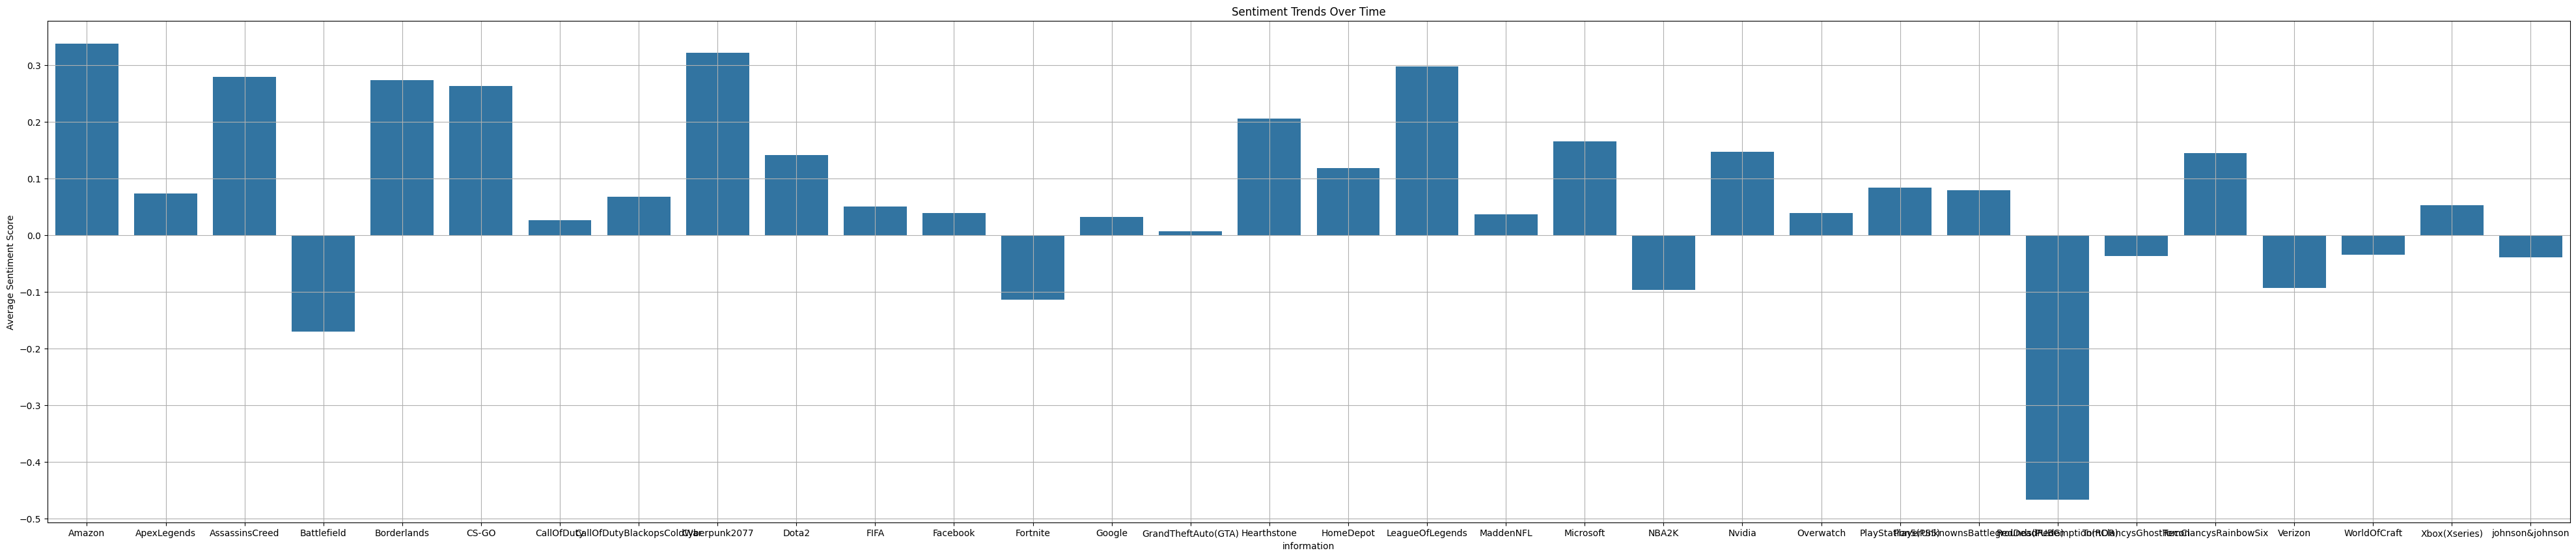

In [ ]:
plt.figure(figsize=(50, 10))
sns.barplot(sentiment_trends)
plt.title('Sentiment Trends Over Time')
plt.xlabel('information')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In [ ]:
sentiment_trends = valdf.groupby('type')['sentiment'].mean()

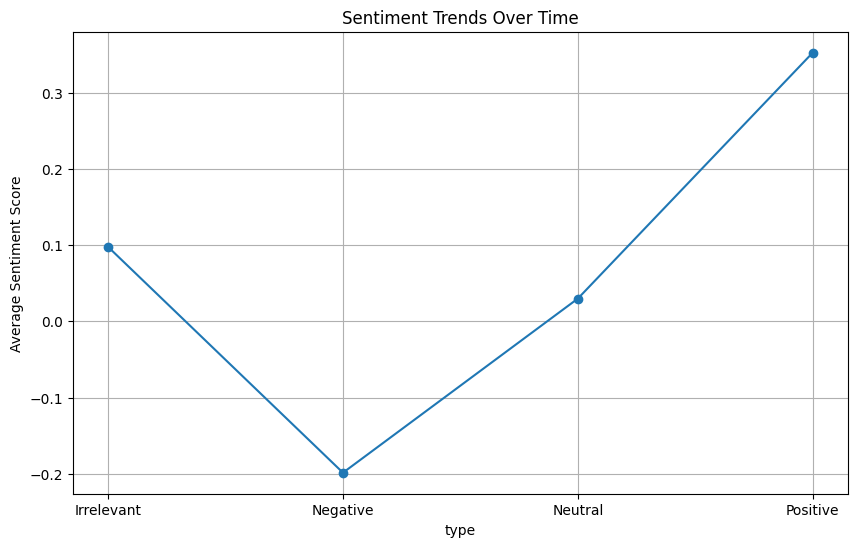

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends, marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('type')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()